<a href="https://colab.research.google.com/github/rywards/belarusian_regression/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving belarus_used_cars.csv to belarus_used_cars.csv


In [3]:
df = pd.read_csv("belarus_used_cars.csv", delimiter=",")
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


In [4]:
df.location_region.value_counts()

Минская обл.        24230
Гомельская обл.      3140
Витебская обл.       3007
Брестская обл.       2991
Могилевская обл.     2678
Гродненская обл.     2485
Name: location_region, dtype: int64

In [5]:
df.shape
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

Text(0, 0.5, 'Frequency Range')

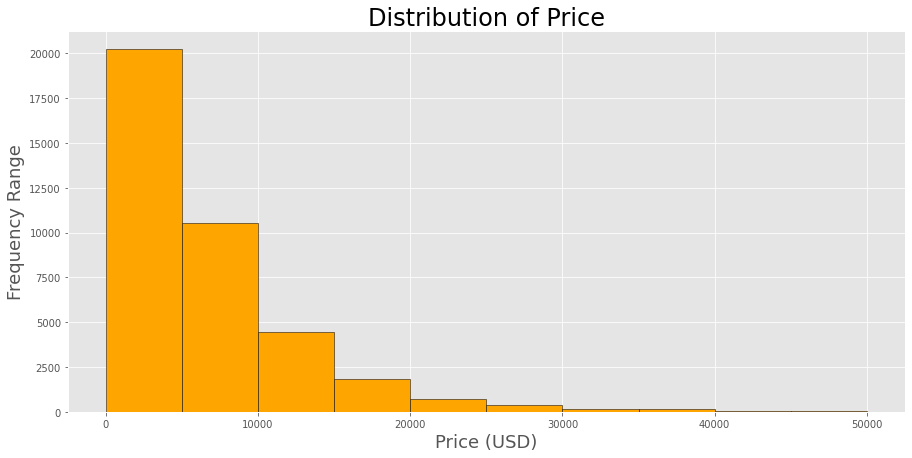

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# histogram of the price
df.price_usd.plot(kind='hist', color='orange', edgecolor='black', figsize=(15,7))
plt.title('Distribution of Price', size=24)
plt.xlabel('Price (USD)', size=18)
plt.ylabel('Frequency Range', size=18)


Text(0, 0.5, 'Frequency')

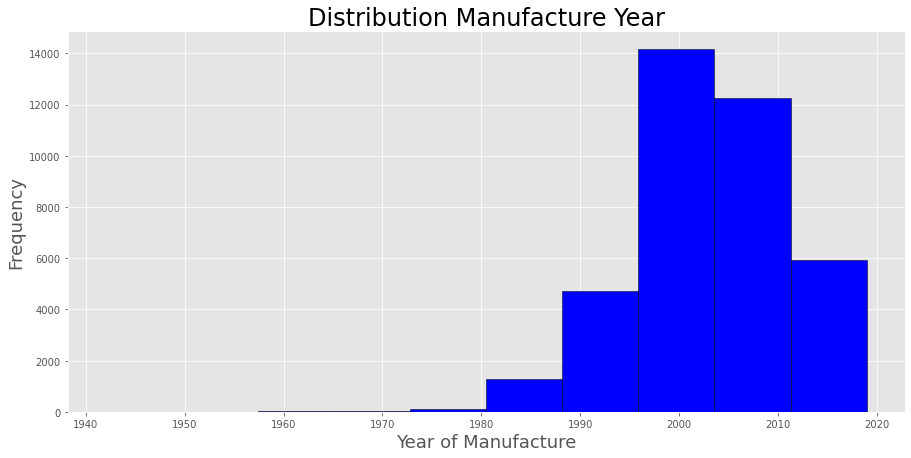

In [7]:
# model year
# histogram of the price
df.year_produced.plot(kind='hist', color='blue', edgecolor='black', figsize=(15,7))
plt.title('Distribution Manufacture Year', size=24)
plt.xlabel('Year of Manufacture', size=18)
plt.ylabel('Frequency', size=18)

In [69]:
# preprocessing and label encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
region = df[['location_region']]
region['Oblast'] = le.fit_transform(df['location_region'])
oblastNum = region.drop(['location_region'], axis = 1)
region.value_counts()
oblastNum.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Oblast
4         24230
2          3140
1          3007
0          2991
5          2678
3          2485
dtype: int64

In [78]:

features = ['odometer_value', 'year_produced', 'price_usd', 
            'number_of_photos', 'up_counter', 'duration_listed']
#x = df.drop(['location_region'], axis =1)
x = df[features]
y = oblastNum

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)


print(x_test)
print(y_test)

       odometer_value  year_produced  ...  up_counter  duration_listed
27108           66000           2016  ...           2               84
20942          622641           1990  ...           1               16
19807          312000           1995  ...          18               42
2173           350000           2008  ...          61               91
27420          230000           2004  ...          12              190
...               ...            ...  ...         ...              ...
21641          105000           2011  ...           1               68
37506          389000           2000  ...           1               37
36786          112000           2007  ...           5               13
12461          300000           1998  ...          16               79
14680          200000           2001  ...           2               58

[3854 rows x 6 columns]
       Oblast
27108       2
20942       5
19807       4
2173        4
27420       4
...       ...
21641       4
37506      

In [90]:
# preprocessing data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_train)
scaler

print("Mean: {}".format(scaler.mean_))


x_scaled = scaler.transform(x_train)

print("X-Scaled Mean: {}".format(x_scaled.mean(axis=0)))
print("X-Scaled STDV: {}".format(x_scaled.std(axis=0)))


Mean: [2.49143945e+05 2.00293163e+03 6.61968239e+03 9.64697061e+00
 1.62498198e+01 8.05707818e+01]
X-Scaled Mean: [ 9.59971369e-17 -1.38703056e-14  5.57336633e-17 -5.86023077e-17
  1.70069634e-17  5.92170172e-17]
X-Scaled STDV: [1. 1. 1. 1. 1. 1.]


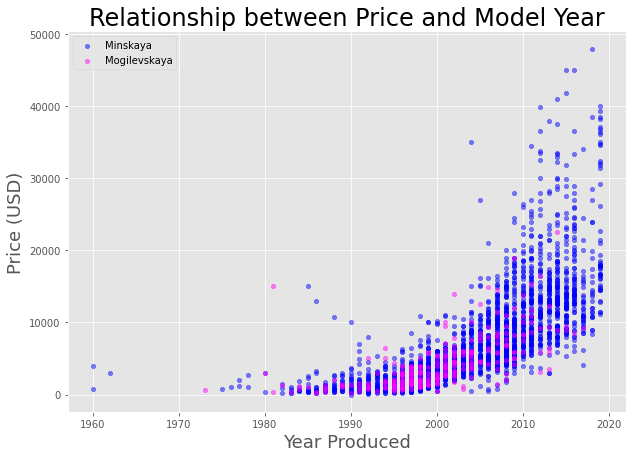

In [11]:
# using training data to train the model
ax1 = test[test['location_region'] == 'Минская обл.'].plot(kind='scatter', x='year_produced', y='price_usd', color='blue', alpha=0.5, figsize=(10, 7))
test[test['location_region'] == 'Могилевская обл.'].plot(kind='scatter', x='year_produced', y='price_usd', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Minskaya', 'Mogilevskaya'])
plt.title('Relationship between Price and Model Year', size=24)
plt.xlabel('Year Produced', size=18)
plt.ylabel('Price (USD)', size=18);

In [14]:
from sklearn.linear_model import LinearRegression

test_minsk = test[test['location_region'] == 'Минская обл.']

# create linear regression object
lr_minsk = LinearRegression()

# fit linear regression
lr_minsk.fit(test_minsk[['price_usd']], test_minsk['year_produced'])

# get the slope and intercept of the line best fit
print("Intercept: {}".format(lr_minsk.intercept_))


print("R-squared coefficient: {}".format(lr_minsk.coef_))


# Mogil region
test_mogil = test[test['location_region'] == 'Могилевская обл.']

# create linear regression object
lr_mogil = LinearRegression()

# fit linear regression
lr_mogil.fit(test_mogil[['price_usd']], test_mogil['year_produced'])

# get the slope and intercept of the line best fit
print("Intercept: {}".format(lr_mogil.intercept_))


print("R-squared coefficient: {}".format(lr_mogil.coef_))


Intercept: 1997.8153836234635
R-squared coefficient: [0.00085282]
Intercept: 1994.5691263810754
R-squared coefficient: [0.00129102]


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.1)


print(train)
print(test)

      manufacturer_name model_name  ... feature_9 duration_listed
12830           Renault      Rapid  ...     False               3
22267            Toyota      Camry  ...      True             135
17012        Volkswagen     Sharan  ...     False              90
1640                Kia     Clarus  ...     False              90
5582         Mitsubishi     Lancer  ...     False              31
...                 ...        ...  ...       ...             ...
11581              Ford      S-Max  ...      True              58
13237           Renault     Megane  ...      True              66
24756           Lincoln   Town Car  ...      True              80
37826           Peugeot        605  ...     False              69
15948        Volkswagen      Jetta  ...     False              11

[3853 rows x 30 columns]
      manufacturer_name         model_name  ... feature_9 duration_listed
9258               Fiat              Bravo  ...     False              55
27343            Suzuki           

In [92]:
# logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(x_scaled, y_train)

y_pred=logreg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [93]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 288,    0,    0,    0,    8,    0],
       [ 304,    0,    0,    0,    2,    0],
       [ 320,    0,    0,    0,    7,    0],
       [ 249,    0,    0,    0,    5,    0],
       [2312,    0,    0,    0,  109,    0],
       [ 241,    0,    0,    0,    9,    0]])

Text(0.5, 257.44, 'Predicted label')

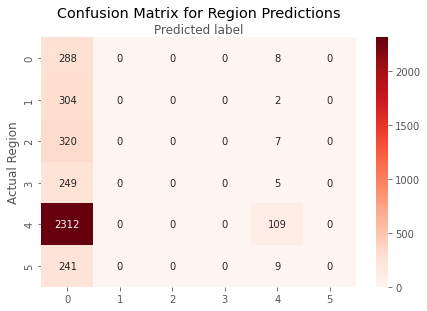

In [98]:
from ast import increment_lineno
# heatmap of confusion matrix
import seaborn as sns
%matplotlib inline

class_names=[0,1,2,3,4,5]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Reds" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Region Predictions', y=1.1)
plt.ylabel('Actual Region')
plt.xlabel('Predicted label')

In [140]:
# matrix metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average='micro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='micro'))

Accuracy:  0.09392838609237156
Precision:  0.09392838609237156
Recall: 0.09392838609237156


In [141]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

12.408925791385574

In [115]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


In [116]:
le = LabelEncoder()
region = df[['location_region']]
region['Oblast'] = le.fit_transform(df['location_region'])
oblastNum = region.drop(['location_region'], axis = 1)
region.value_counts()
oblastNum.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Oblast
4         24230
2          3140
1          3007
0          2991
5          2678
3          2485
dtype: int64

In [123]:
features = ['odometer_value', 'year_produced', 'price_usd', 
            'number_of_photos', 'up_counter', 'duration_listed']
#x = df.drop(['location_region'], axis =1)
x = df[features]
y = oblastNum

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)


print(x_test)
print(y_test)
print(x_scaled)

       odometer_value  year_produced  ...  up_counter  duration_listed
4934           111700           2011  ...           7               17
16037          310542           1993  ...          10               50
2491           145000           2007  ...          31               72
23762           10000           2010  ...           2               21
17850          300000           1996  ...           9              413
...               ...            ...  ...         ...              ...
35876          135000           2006  ...           3               90
4416           370000           2001  ...           5              177
276            142000           2010  ...          46              153
28021          298563           1994  ...          14               35
5485           300000           1997  ...          17               61

[3854 rows x 6 columns]
       Oblast
4934        4
16037       2
2491        4
23762       4
17850       1
...       ...
35876       4
4416       

In [127]:
# preprocessing data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_train)
scaler

print("Mean: {}".format(scaler.mean_))


x_test_scaled = scaler.transform(x_train)

print("X-Scaled Mean: {}".format(x_test_scaled.mean(axis=0)))
print("X-Scaled STDV: {}".format(x_test_scaled.std(axis=0)))


Mean: [2.48996577e+05 2.00293122e+03 6.63521087e+03 9.64016495e+00
 1.62004787e+01 8.05629380e+01]
X-Scaled Mean: [3.60629586e-17 1.15157633e-14 1.55214154e-16 1.12901649e-16
 5.32748252e-17 2.62276062e-17]
X-Scaled STDV: [1. 1. 1. 1. 1. 1.]


In [129]:
# creating SVM model
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [139]:
regr.predict(x_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([3.56339936, 3.56339936, 3.56339936, ..., 3.56339936, 3.56339936,
       3.56339936])